<div class="alert alert-block alert-info">
<b> <center>Lending Case Club Study </center></b>  
</div>

In [1852]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format='{:.2f}'.format
sns.set_color_codes()

In [1334]:
loan_data=pd.read_csv("loan.csv", low_memory=False)
loan_data.head()
pd.set_option('Max_Columns',100)
pd.set_option('Max_Rows',100)



In [1335]:
loan_data.shape # sahpe the data frame (rows, col)
loan_data.dropna(axis = 1, how = 'all')
loan_data.set_index('id')
loan_data.shape


(39717, 111)

In [1336]:
# checking any Duplicate ID
loan_data.duplicated(['id']).sum()

0

In [1341]:
#Finding % of missing values and null 
m_n=round((loan_data.isnull().sum()/len(loan_data.index))*100,2) 
# Check columns having morethan 70% missing
m_n[m_n>0].sort_values().count()#M=Missing Value & N=Null value
loan_data.count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [1857]:
#Deleting columns if missing and Null vales gratethan 50%
loan_data.drop(m_n[m_n>50].index, axis=1,inplace=True)
loan_data.count()

loan_amnt                   36737
funded_amnt                 36737
funded_amnt_inv             36737
term_mths                   36737
int_rate_percentage         36737
installment                 36737
grade                       36737
sub_grade                   36737
emp_length_years            36737
home_ownership              36737
annual_inc                  36737
verification_status         36737
issue_d                     36737
loan_status                 36737
purpose                     36737
dti                         36737
delinq_2yrs                 36737
earliest_cr_line            36737
inq_last_6mths              36737
open_acc                    36737
pub_rec                     36737
revol_bal                   36737
revol_util                  36737
total_acc                   36737
total_rec_prncp             36737
total_rec_int               36737
total_rec_late_fee          36737
recoveries                  36737
collection_recovery_fee     36737
last_pymnt_d  

In [1471]:
#loan_data.drop([loan_data.nunique().sort_values()])
loan_data.shape



(39717, 54)

In [1473]:
loan_data.nunique().sort_values()


tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [1476]:
#dropping columns only one value presented 
loan_data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

 <div class="alert alert-block alert-warning">
<b> <center>Renaming Column names </center></b> 
</div>

In [1477]:
loan_data.rename(columns = {'term':'term_mths','int_rate':'int_rate_percentage','emp_length':'emp_length_years'}, inplace = True)

<div class="alert alert-block alert-warning">
<b> <center>Data Conversion </center></b> 
</div>

In [1509]:
loan_data["term_mths"]=loan_data["term_mths"].str.replace("months","")
loan_data["int_rate_percentage"]=loan_data["int_rate_percentage"].str.replace("%","").astype(float)
loan_data["emp_length_years"]=loan_data["emp_length_years"].str.replace("years","").str.replace("year"," ").str.replace("+"," ").str.replace("< 1","0")
loan_data["revol_util"]=loan_data["revol_util"].str.replace("%","")
#customer['Cust_id'] =customer['Cust_id'].map(lambda x: x.lstrip('Cust_'))

In [1510]:
loan_data[['installment','recoveries','collection_recovery_fee','last_pymnt_amnt','annual_inc','total_rec_int','total_rec_prncp','total_rec_late_fee']]=round(actual_loan_data[['installment','recoveries','collection_recovery_fee','last_pymnt_amnt','annual_inc','total_rec_int','total_rec_prncp','total_rec_late_fee']]).astype(int)
loan_data.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term_mths,int_rate_percentage,installment,grade,sub_grade,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,last_pymnt_amnt
0,5000,5000,4975.00,36,10.65,163,B,B2,10,RENT,24000,Verified,01/12/2011,Fully Paid,credit_card,27.65,0,01/01/1985,1,3,0,13648,83.70,9,5000,863,0,0,0,01/01/2015,01/05/2016,0.00,172
1,2500,2500,2500.00,60,15.27,60,C,C4,0,RENT,30000,Source Verified,01/12/2011,Charged Off,car,1.00,0,01/04/1999,5,3,0,1687,9.40,4,456,435,0,117,1,01/04/2013,01/09/2013,0.00,120
2,2400,2400,2400.00,36,15.96,84,C,C5,10,RENT,12252,Not Verified,01/12/2011,Fully Paid,small_business,8.72,0,01/11/2001,2,2,0,2956,98.50,10,2400,606,0,0,0,01/06/2014,01/05/2016,0.00,650
3,10000,10000,10000.00,36,13.49,339,C,C1,10,RENT,49200,Source Verified,01/12/2011,Fully Paid,other,20.00,0,01/02/1996,1,10,0,5598,21,37,10000,2215,17,0,0,01/01/2015,01/04/2016,0.00,357
5,5000,5000,5000.00,36,7.90,156,A,A4,3,RENT,36000,Source Verified,01/12/2011,Fully Paid,wedding,11.20,0,01/11/2004,3,9,0,7963,28.30,12,5000,632,0,0,0,01/01/2015,01/01/2016,0.00,161


In [1502]:
#Delete SOme of COlumns which are not required for analysis
loan_data.drop(['id','member_id','desc','title','zip_code','addr_state','url','last_credit_pull_d'],axis=1,inplace=True)


KeyError: "['id' 'member_id' 'desc' 'title' 'zip_code' 'addr_state' 'url'\n 'last_credit_pull_d'] not found in axis"

In [1487]:
# total_pymnt, total_pymnt_inv,emp_title,out_prncp,out_prncp_inv,(only for current customer)
loan_data.drop(['total_pymnt','total_pymnt_inv','emp_title','out_prncp','out_prncp_inv','last_pymnt_amnt'],axis=1,inplace=True)

In [1492]:

#Finding % of missing values and null 
m_n=round((loan_data.isnull().sum()/len(loan_data.index))*100,2) 
m_n[m_n>0]#M=Missing Value & N=Null value


emp_length_years       2.71
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

In [1495]:
#removing Null valued Rows in Data set
loan_data.dropna(subset=['emp_length_years','revol_util','last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies'], inplace=True)
m_n[round((loan_data.isnull().sum()/len(loan_data.index))*100,2)>0]#M=Missing Value & N=Null value


Series([], dtype: float64)

<div class="alert alert-block alert-warning">
<b> <center> Removing current employee </center></b> 
</div>

In [1858]:
loan_data=loan_data[loan_data.loan_status != "Current"]
loan_data['loan_status'].unique()# columns of sub divison 


array(['Fully Paid', 'Charged Off'], dtype=object)

<div class="alert alert-block alert-warning">
<b> <center> Converting DataTime type </center></b> 
</div>


In [1524]:
loan_data['issue_d']=pd.to_datetime(loan_data.issue_d,format='%d/%m/%Y')
  
loan_data['last_pymnt_d']=pd.to_datetime(loan_data.last_pymnt_d,format='%d/%m/%Y')
   


In [1522]:
loan_data['purpose'].unique()


array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

<div class="alert alert-block alert-warning">
<b> <center>Derived Variables </center></b> 
</div>

In [1569]:
loan_data['total_mnths_paid']=loan_data['last_pymnt_d']-loan_data['issue_d']
loan_data['total_mnths_paid'] = (round((loan_data.total_mnths_paid.dt.days.astype(int)/365))*12).astype(int)
loan_data['total_mnths_paid']

0        36
1        12
2        36
3        36
5        36
         ..
39562    12
39573    24
39623    12
39666    24
39680    36
Name: total_mnths_paid, Length: 36737, dtype: int32

<div class="alert alert-block alert-warning">
<b> <center> Loan Approved by Investor </center></b> 
</div>


In [1617]:
# Loan Approved by Investor
loan_data['approved_loan_amnt_ratio'] = round(loan_data.funded_amnt_inv*100/loan_data.loan_amnt,2)

<div class="alert alert-block alert-warning">
<b> <center> Univariate Analysis </center></b> 
</div>

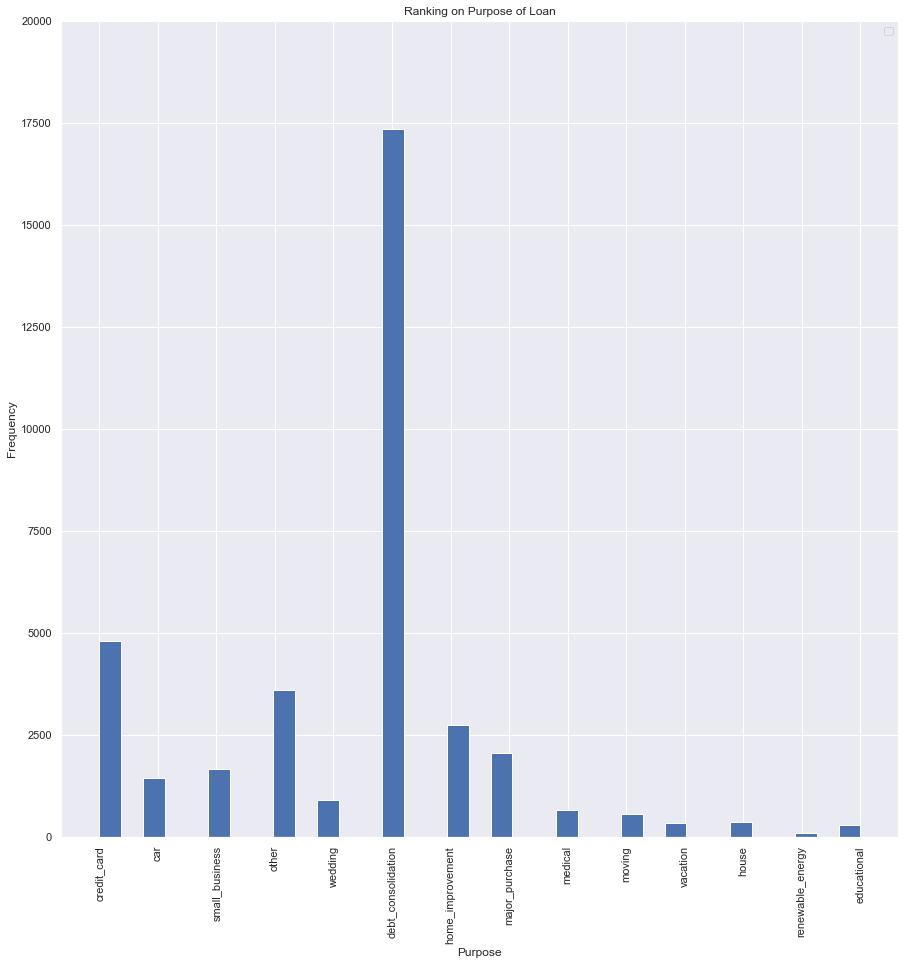

In [1661]:
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 22})
plt.xticks(rotation=90)
plt.ylim(0, 20000)
plt.grid(True)
plt.hist(loan_data.purpose, bins=35)
plt.title('Ranking on Purpose of Loan')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.legend('Purpose','Freq')
plt.show()

<div class="alert alert-block alert-danger">
 <b> <center>Outlier Checking</center></b> 
</div>

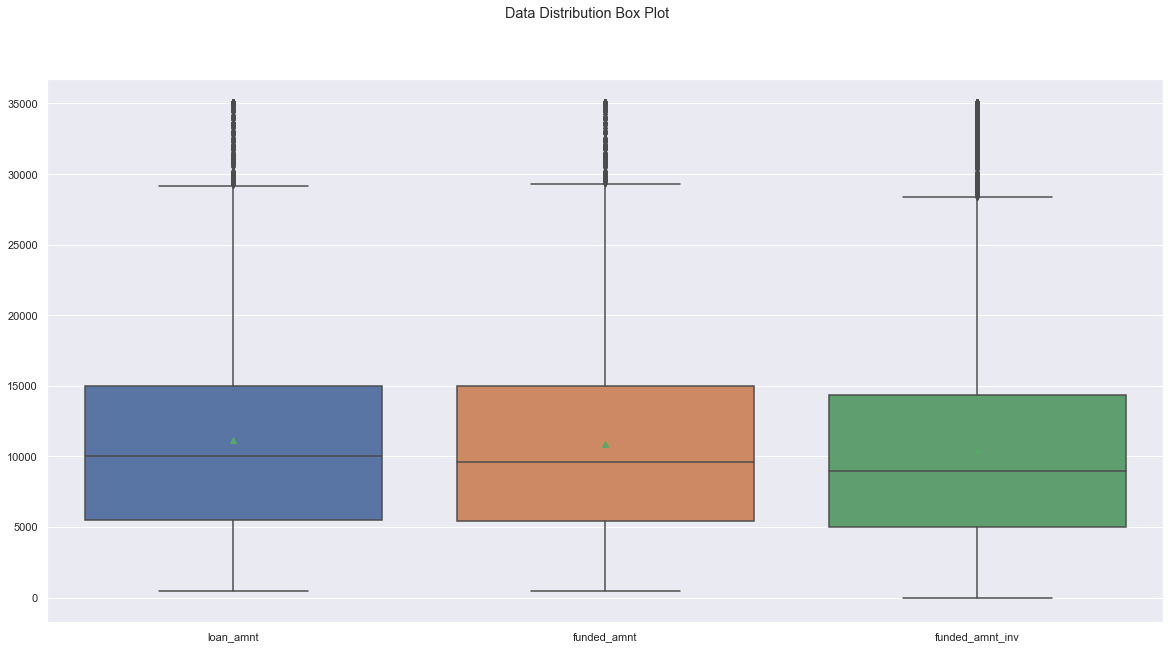

In [1679]:
#Increasing the figure size of plot
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
sns.boxplot(data=loan_data[['loan_amnt', 'funded_amnt','funded_amnt_inv']], orient='v',showmeans=True)
plt.suptitle('Data Distribution Box Plot')
plt.show()

<div class="alert alert-block alert-success">
<b>Observations:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

No handles with labels found to put in legend.


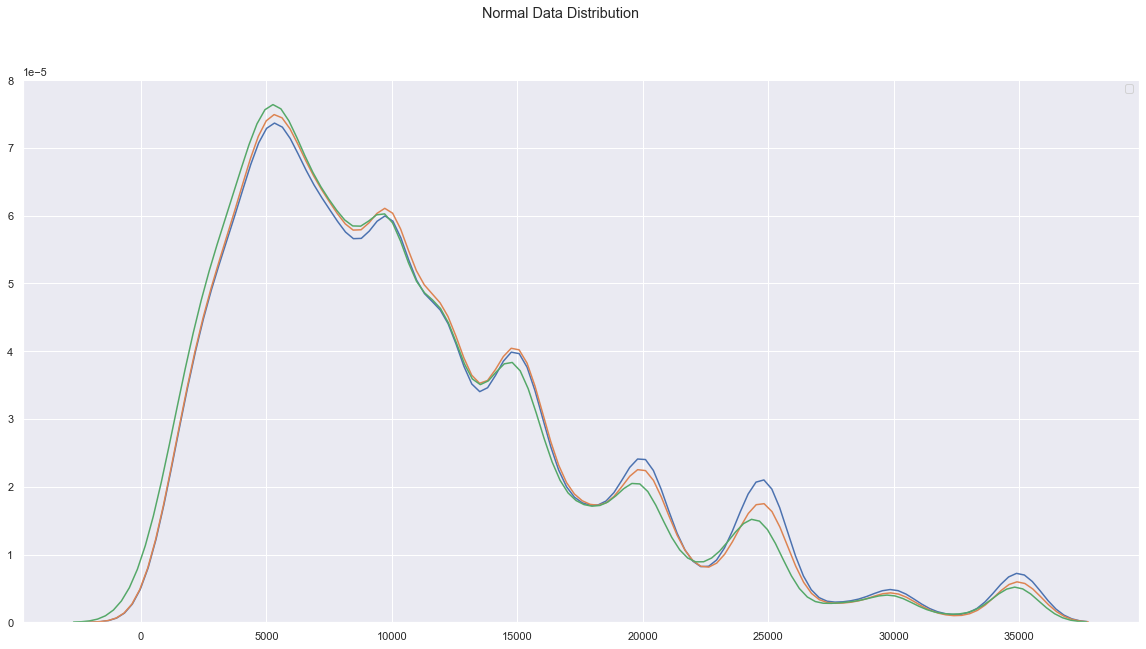

In [1855]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
sns.distplot(loan_data[['loan_amnt']], hist=False, rug=False)
sns.distplot(loan_data[['funded_amnt']], hist=False, rug=False)
sns.distplot(loan_data[['funded_amnt_inv']], hist=False, rug=False)
plt.legend()
plt.suptitle('Normal Data Distribution ')
plt.show()

<div class="alert alert-block alert-success">
<b>Observations:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

In [1670]:

round(loan_data[['loan_amnt','funded_amnt','funded_amnt_inv']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])).astype(int)

,loan_amnt,funded_amnt,funded_amnt_inv
count,36737,36737,36737
mean,11153,10884,10444
std,7368,7107,7008
min,500,500,0
5%,2400,2400,2000
10%,3200,3200,3000
25%,5500,5425,5000
50%,10000,9600,9000
75%,15000,15000,14352
90%,22000,20375,20000


<div class="alert alert-block alert-success">
<b>Observations:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<AxesSubplot:xlabel='intrate_groups', ylabel='count'>

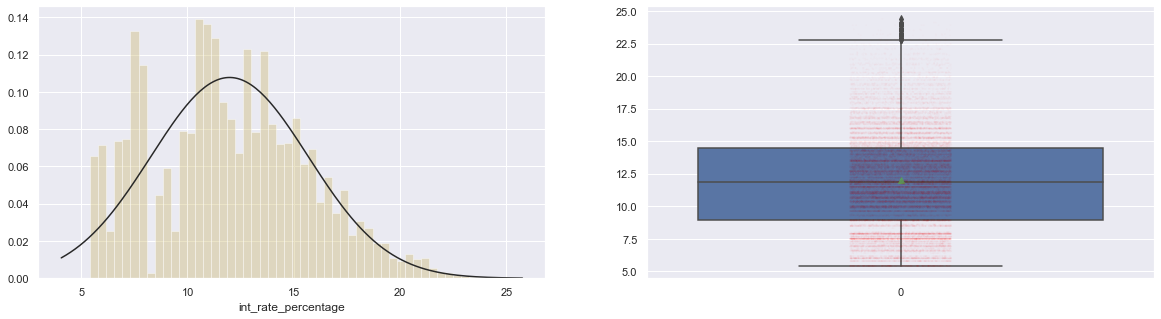

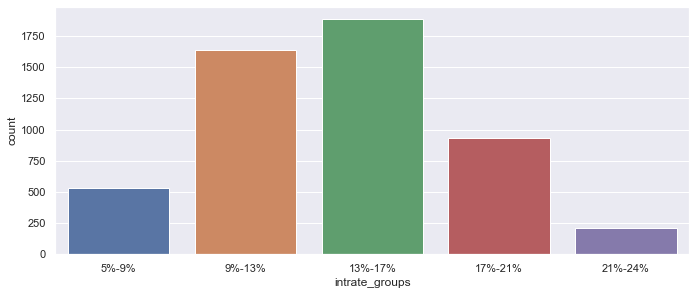

In [1734]:
#int_rate_percentage
from scipy.stats import norm
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(loan_data.int_rate_percentage, fit=norm, kde=False, color="y")
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.int_rate_percentage, orient='v',showmeans=True)
sns.stripplot( data = loan_data.int_rate_percentage ,color = 'red',size = 2, alpha = 0.01)
# Analysing  Intreset Rate group
loan_data['intrate_groups'] = pd.cut(loan_data['int_rate_percentage'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
fig, ax = plt.subplots(figsize = (25,10))
plt.subplot(221)
sns.countplot(x='intrate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

#Most borrower Took loan intrest rate lie between 9% to 14% whereas few borrower took high interest rate >23(around 250)


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

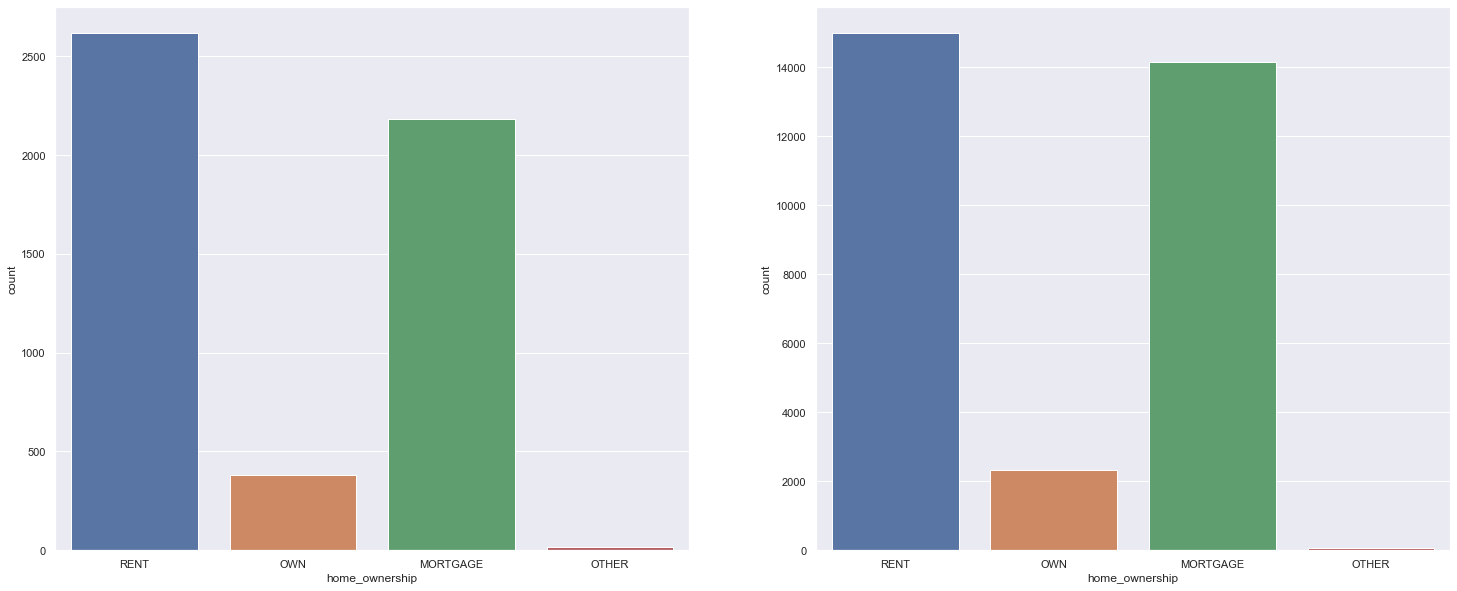

In [1769]:
# Analysing  Loan borrowed person have assests
plt.subplots(figsize = (25,10))
plt.subplot(1,2,1)
sns.countplot(x='home_ownership', data=loan_data[loan_data.loan_status == 'Charged Off'])
#sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(1,2,2)
sns.countplot(x='home_ownership', data=loan_data[loan_data.loan_status == 'Fully Paid'])
#Ratio between Rent and Mortage of Cahrged off customers are higher than Full Paid
# Rented Charged of customers are more than own house customers 



<div class="alert alert-block alert-success">
<b>Observations:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<AxesSubplot:xlabel='verification_status', ylabel='count'>

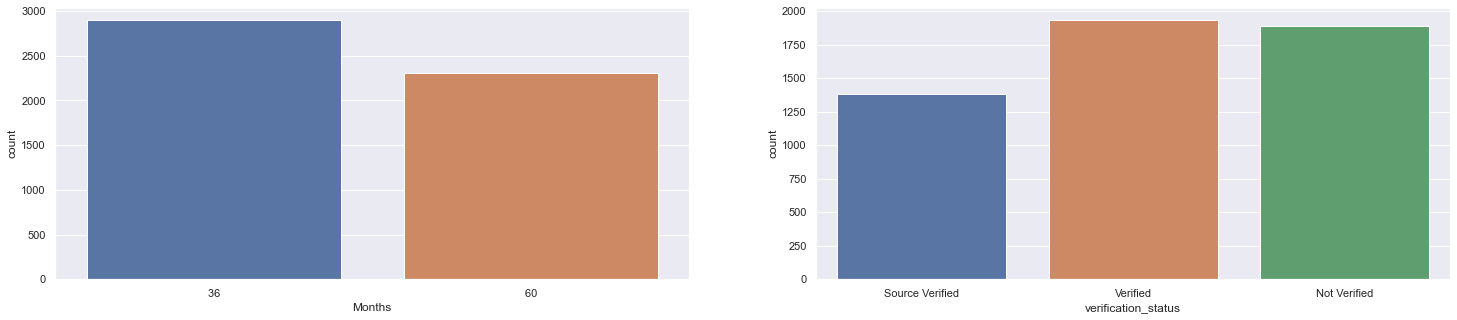

In [1791]:
# Analysing  Loan borrowed person have assests
plt.subplots(figsize = (25,5))
plt.rcParams.update({'font.size': 30})
plt.subplot(1,2,1)
sns.countplot(x='term_mths', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Months')
#there are more charged off customer for 36 months than 60 months

# Analysing  Verification status for charged of customers.
plt.subplot(1,2,2)
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])
#verified and not verified customers are more that source verified customers


<div class="alert alert-block alert-success">
<b>Observations:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>


Text(0.5, 0, 'Loan_amount_group')

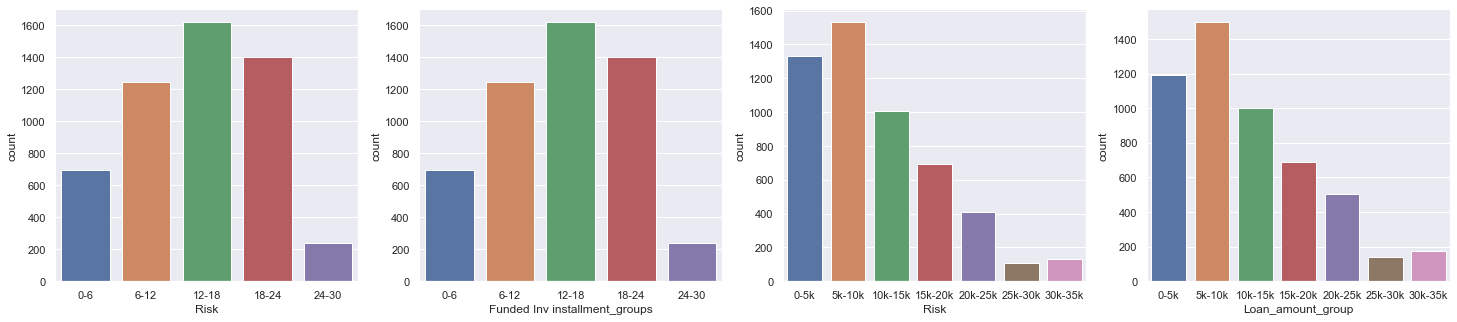

In [1789]:
# analysing Risk dti
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
plt.subplots(figsize = (25,5))
plt.rcParams.update({'font.size': 30})
plt.subplot(1,4,1)
sns.countplot(x='dti_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Risk')
# ###############
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
plt.subplot(1,4,2)
sns.countplot(x='dti_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Funded Inv installment_groups')
######
loan_data['fun_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
plt.subplot(1,4,3)
sns.countplot(x='fun_amnt_inv_group', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Risk')
########
#12345
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.subplot(1,4,4)
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Loan_amount_group')

<div class="alert alert-block alert-success">
<b>Observations:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-warning">
<b> <center>correlation matric </center></b> 
</div>

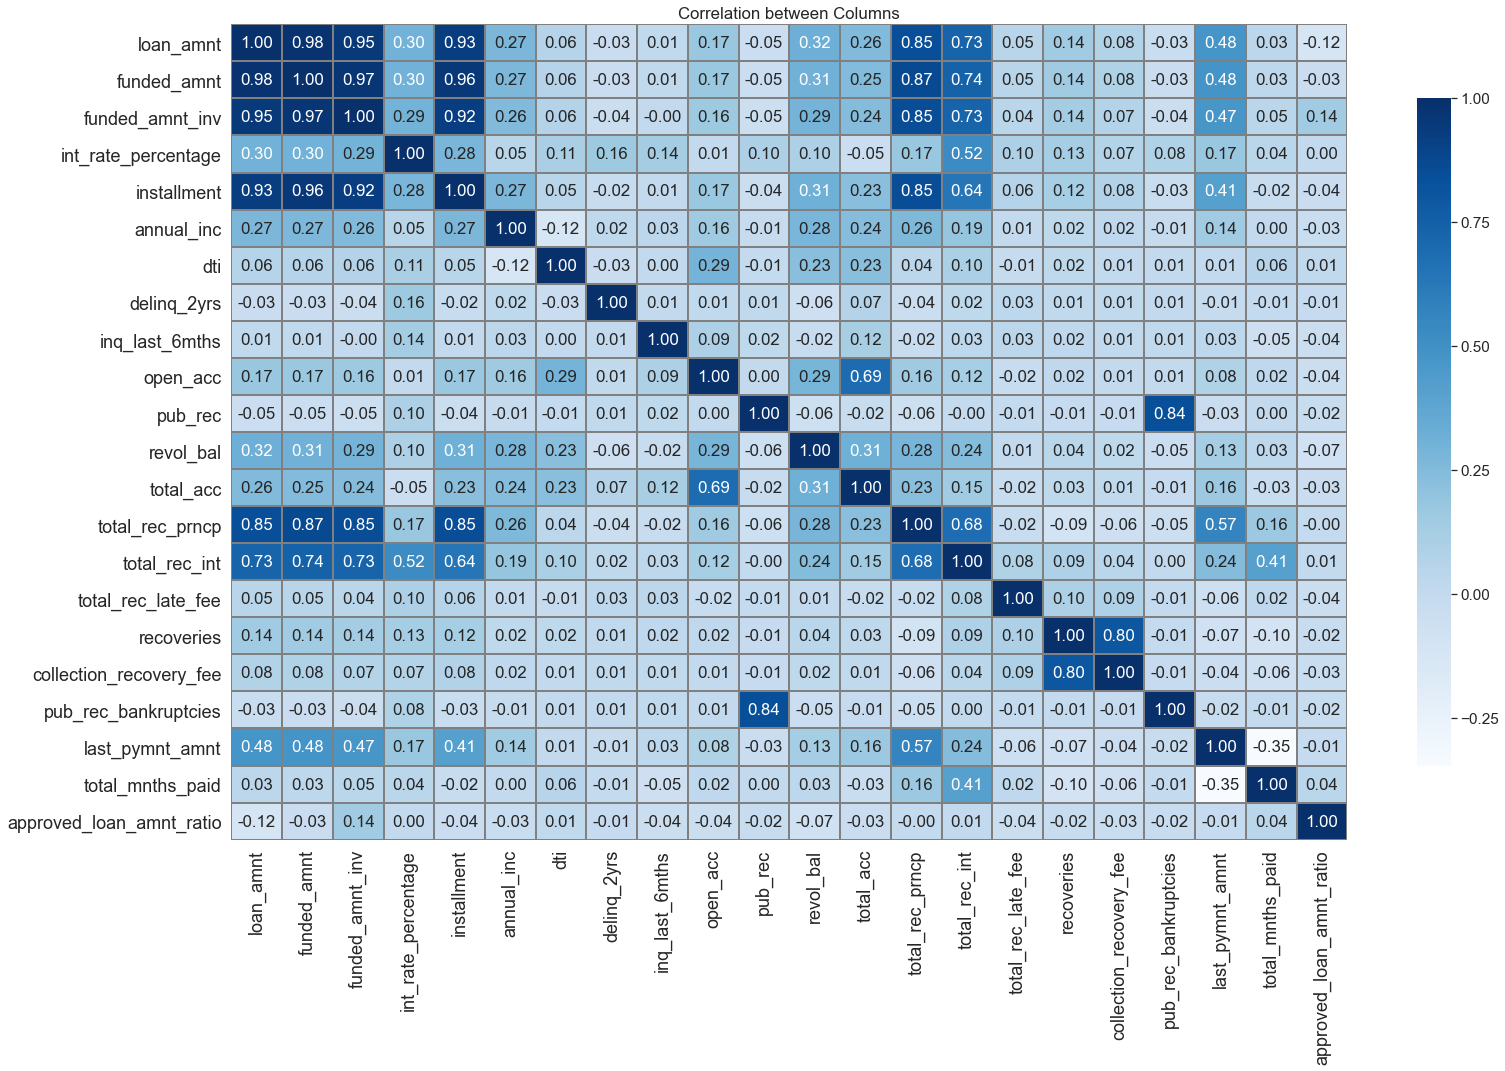

In [1851]:
#Finding correlation matric
corr_matrix = loan_data.corr()
plt.figure(figsize=(25,15))
#plotting correlatioon matric on a heat map
sns.set(font_scale=1.4)
ax = sns.heatmap(corr_matrix,  annot = True, fmt='.2f',cmap='Blues',cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.title("Correlation between Columns")
plt.show()

<div class="alert alert-block alert-success">
<b>Observations:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

#### Recommedations:

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

- Main bullet point
     - Sub bullet point

**string**